***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python MicroKinetics Code}}$$<br>
$$\mathbf{\text{Testing out the Fitting subgroup}}$$<br>
$\mathbf{\text{Date: 10/22}}$<br>
***

In [1]:
from main import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
num_dat_model_1 = 40 #for ML data generation
filename_model_1='ML_dataset_1.xlsx'

## Generating files for fitting:

In [2]:
#For Model 1: (without CD) (i.e MKM1)
MKM1 = MKModel('Atomic_1.csv','Stoich_1.csv','Param_1.csv') #Defining the Model
#Intitializations
MKM1.set_initial_coverages(init=[0,0,0,1]) #Sets the initial coverages of all the surface species
MKM1.set_rxnconditions() #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
MKM1.set_limits_of_integration(Ti=0,Tf=6e6)#Sets the reange of time used in integration

sol1,solt1= MKM1.solve_coverage(plot=False) #Coverages

#Creating dataset for ML
MKM1.create_csv(sol1,solt1,Name='coverages_1_nCD.csv',label='coverages') #sol1 = coverages, solt=corresponding time. These awere calculated before from MKM1

Mass is conserved. 



In [3]:
#For Model 1: (with CD) (i.e MKM1CD)
MKM1CD = MKModel('Atomic_1.csv','Stoich_1.csv','Param_1.csv') #Defining the Model
MKM1CD.rate_const_correction='Forced_exp_CD'
#Intitializations
MKM1CD.set_initial_coverages(init=[0,0,0,1]) #Sets the initial coverages of all the surface species 
MKM1CD.set_rxnconditions() #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
MKM1CD.set_limits_of_integration(Ti=0,Tf=6e6)#Sets the reange of time used in integration

sol1CD,solt1CD= MKM1CD.solve_coverage(plot=False)

#Creating dataset for ML
MKM1CD.create_csv(sol1CD,solt1CD,Name='coverages_1_wCD.csv',label='coverages')

Mass is conserved. 



In [4]:
#For Model 2: (without CD) (i.e MKM2)
MKM2 = MKModel('Atomic_2.csv','Stoich_2.csv','Param_2.csv') #Defining the Model
#Intitializations
MKM2.set_initial_coverages(init=[0.5,0.5,0,0,0,0,0])
MKM2.set_rxnconditions()
MKM2.set_limits_of_integration(Ti=0,Tf=4e-11)

sol3,solt3= MKM2.solve_coverage(plot=False)

#Creating dataset for ML
MKM2.create_csv(sol3,solt3,Name='coverages_2_nCD.csv',label='coverages')

Mass is conserved. 



In [5]:
#For Model 2: (with CD) (i.e MKM2CD)
MKM2CD = MKModel('Atomic_2.csv','Stoich_2.csv','Param_2.csv')
MKM2CD.rate_const_correction='Forced_exp_CD'
#Intitializations
MKM2CD.set_initial_coverages(init=[0.5,0.5,0,0,0,0,0])
MKM2CD.set_rxnconditions()
MKM2CD.set_limits_of_integration(Ti=0,Tf=4e-11)

sol3CD,solt3CD= MKM2CD.solve_coverage(plot=False)

#Creating dataset for ML
MKM2CD.create_csv(sol3CD,solt3CD,Name='coverages_2_wCD.csv',label='coverages')

Mass is conserved. 



## Model 1

***
$\mathbf{\text{Micro Kinetic Model for (a Simple 4-Step Mechanism) CO Oxidation}}:$<br>
#### [Link to Relevant Paper](https://pubs.acs.org/doi/10.1021/cs500377j) 
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + \frac{1}{2} O_2 {\stackrel{\tiny{\textrm{Pt/Pd}}}{\rightleftharpoons}} CO_2 $$
$Ea = 80kJ{mol}^{-1}->120kJ{mol}^{-1}$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of CO / Desorption of CO*

$$ CO(g) + * \rightleftharpoons CO^{*} $$  <br> 

Reaction 2:&emsp;Adsorption of $O_2$ / Desorption of $O_2^*$

$$ {O_2}(g) + * \rightleftharpoons {O_2}^{*} $$  <br> 

Reaction 3:&emsp;Dissociation of ${O_2}^*$ / Recombination of O*

$$ {O_2}^* + * \rightleftharpoons 2{O}^* $$  <br> 

Reaction 4:&emsp;Surface Reaction of CO* and ${O_2}^*$ / Adsorption of $CO_2$

$$ {CO}^{*} + {O}^{*} \rightleftharpoons {{CO}_2}(g) + 2* $$  <br> 

***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$

### The Atomic/Species Matrix ($\nu$):

The participating species for this surface reaction mechanism are:
1. CO
2. $O_2$
3. $CO_2$
4. $CO^*$
5. $O^*$
6. ${O_2}^*$
7. *

\begin{equation}
\
\nu=\begin{bmatrix}
    &   CO    &   O_2   &   CO_2  &      CO^*    &     O*     &    O_2^*     &   *\\
C   &   1     &   0     &   1     &      1       &     0      &     0        &   0\\
O   &   1     &   2     &   2     &      1       &     1      &     2        &   0\\
*   &   0     &   0     &   0     &      1       &     1      &     1        &   1\end{bmatrix} 
\
\end{equation}

Atomic Matrix Size : (3x7)
### The Stoichiometric Matrix (A):

\begin{equation}
\
A=\begin{bmatrix}
    & P_{CO} & P_{O_2} & P_{CO_2} & \theta_{CO} & \theta_{O} & \theta_{O_2} &\theta_{*}\\
r_1 &  -1     &   0     &   0     &      1       &     0      &     0        &  -1\\
r_2 &   0     &  -1     &   0     &      0       &     0      &     1        &  -1\\
r_3 &   0     &   0     &   0     &      0       &     2      &    -1        &  -1\\     
r_4 &   0     &   0     &   1     &     -1       &    -1      &     0        &   2\end{bmatrix} 
\
\end{equation}

Stoichiometric Matrix Size : (4x7)

Note:

- For Mass to be conserved:
$$\mathbf{A}\mathbf{\nu = 0}$$

$i =$ species

$j =$ reaction

- To find the Rate of reaction of reaction j:

$$ r_j = k_{j,f} \prod_{i_f} P_{i,f} \theta_{i,f}^{A_{i,j}} - k_{j,r} \prod_{i_r} P_{i,r} \theta_{i,r}^{A_{i,j}}  $$

- To find the Rate of production of species i:
$$R_{\theta_i}=\frac{d\theta_i}{dt} = \sum_j A_{j,i} \cdot r_j $$

#### Therefore:

Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*}^2 $$

The Corresponding Differential Equations corresponding to the rate of formations/productions of the different coverages:

$$R_{\theta_{CO}} = \frac{d\theta_{CO}}{dt} = r_1 - r_4$$

$$R_{\theta_{O_2}} = \frac{d\theta_{O_2}}{dt} = r_2 - r_3 $$

$$R_{\theta_{O}} = \frac{d\theta_{O}}{dt} = 2 r_3 - r_4 $$

$$R_{\theta_{*}} = \frac{d\theta_{*}}{dt} = 2 r_4 - r_1 - r_2 - r_3 $$



# ----------------------------------------------------------------------------------------

## |--->Without CD

Mass is conserved. 

50.0 % of the Input dataset is being extracted for fitting (i.e 108 points are being extracted for fitting)

An essentially zero vector is present and therefore cant be normalized. The same vector has been returned.

Performing fitting using optimize.curve_fit:
--------------------------------------------------
-Using Method: trf


/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_lsq/least_squares.py:110: UserWarning: Setting `ftol` below the machine epsilon (2.22e-16) effectively disables the corresponding termination condition.
  warn("Setting `{}` below the machine epsilon ({:.2e}) effectively "
/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_lsq/least_squares.py:110: UserWarning: Setting `xtol` below the machine epsilon (2.22e-16) effectively disables the corresponding termination condition.
  warn("Setting `{}` below the machine epsilon ({:.2e}) effectively "



 Initial guess: 

-> Rate Constants:
 [1.e+00 1.e-09 1.e+02 1.e+05 1.e+08 1.e-02 1.e-06 1.e+02]

 Final predictions: 

-> Rate Constants:
 [1.07854319e+02 6.14048271e-08 3.02562132e+02 8.94625798e+04
 1.11600094e+08 4.88853769e-03 3.82948396e-06 3.46225647e+02]


<IPython.core.display.Javascript object>


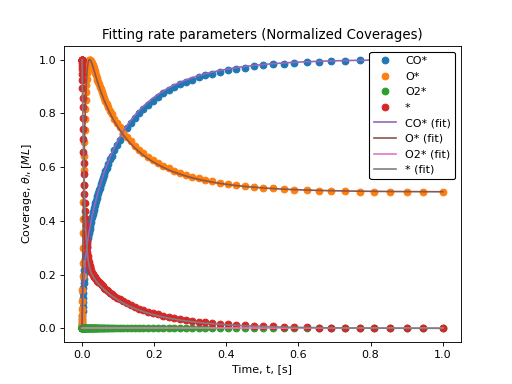

CPU times: user 4min 57s, sys: 11.4 s, total: 5min 8s
Wall time: 4min 28s


In [6]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
fit1_a = Fitting('coverages_1_nCD.csv','Atomic_1.csv','Stoich_1.csv','Param_1_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t1_a,covg1_a,fits1_a = fit1_a.fitting_rate_param(option='cf',xtol=1e-18,ftol=1e-18,plot_norm=True) #cf stands for curve fit

Mass is conserved. 

50.0 % of the Input dataset is being extracted for fitting (i.e 108 points are being extracted for fitting)

An essentially zero vector is present and therefore cant be normalized. The same vector has been returned.

--------------------------------------------------
Performing fitting using optimize.minimize:
--------------------------------------------------
-Using Method: nelder-mead


/Users/klkusima/Desktop/RASH Research/CO_ox/Kinetics/OOP_Kinetics/OOP/OOP3/main.py:1034: OptimizeWarning: Unknown solver options: gtol, maxfun
  result = optimize.minimize(self.error_func_0, initial_vals



 Initial guess: 

-> Rate Constants:
 [1.e+00 1.e-09 1.e+02 1.e+05 1.e+08 1.e-02 1.e-06 1.e+02]

 Final predictions: 

-> Rate Constants:
 [2.43046734e-02 7.74222181e-11 1.19629367e+03 4.01702064e+05
 8.02974072e+04 1.13634916e-05 5.63348349e-06 4.08662188e+02]


<IPython.core.display.Javascript object>


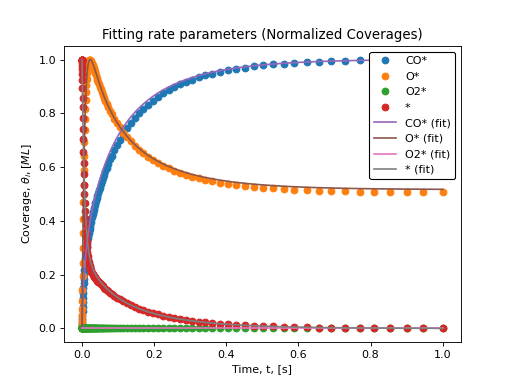

CPU times: user 21min 22s, sys: 4.33 s, total: 21min 26s
Wall time: 21min 26s


In [7]:
%%time 
#Fitting for Model 1: (without CD) #using function minizer
fit1_b_a = Fitting('coverages_1_nCD.csv','Atomic_1.csv','Stoich_1.csv','Param_1_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t1_b_a,covg1_b_a,fits1_b_a = fit1_b_a.fitting_rate_param(option='min',method_min='nelder-mead',maxiter=1e3,maxfun=1e3,plot_norm=True) #min stands for minimize

Mass is conserved. 

50.0 % of the Input dataset is being extracted for fitting (i.e 108 points are being extracted for fitting)

An essentially zero vector is present and therefore cant be normalized. The same vector has been returned.

--------------------------------------------------
Performing fitting using optimize.minimize:
--------------------------------------------------
-Using Method: L-BFGS-B


/Users/klkusima/Desktop/RASH Research/CO_ox/Kinetics/OOP_Kinetics/OOP/OOP3/main.py:1034: OptimizeWarning: Unknown solver options: xatol, fatol, adaptive
  result = optimize.minimize(self.error_func_0, initial_vals



 Initial guess: 

-> Rate Constants:
 [1.e+00 1.e-09 1.e+02 1.e+05 1.e+08 1.e-02 1.e-06 1.e+02]

 Final predictions: 

-> Rate Constants:
 [9.99669834e-01 6.03720005e-09 1.00000248e+02 1.00000000e+05
 1.00000000e+08 9.94957758e-03 6.03720005e-06 1.00000309e+02]


<IPython.core.display.Javascript object>


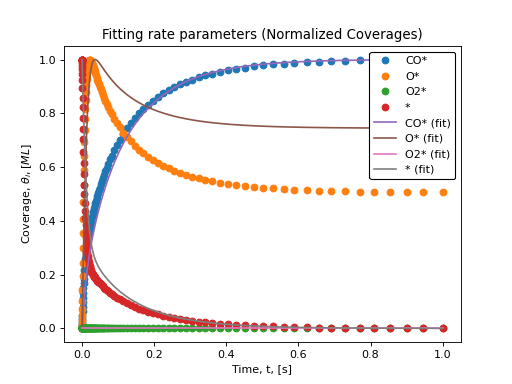

CPU times: user 29min 54s, sys: 5.24 s, total: 29min 59s
Wall time: 29min 57s


In [8]:
%%time 
#Fitting for Model 1: (without CD) #using function minizer
fit1_b_b = Fitting('coverages_1_nCD.csv','Atomic_1.csv','Stoich_1.csv','Param_1_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t1_b_b,covg1_b_b,fits1_b_b = fit1_b_b.fitting_rate_param(option='min',method_min='L-BFGS-B',gtol=1e-12,ftol=1e-8,tol=1e-8,maxiter=1e4,maxfun=1e4,plot_norm=True) #min stands for minimize

Mass is conserved. 

50.0 % of the Input dataset is being extracted for fitting (i.e 108 points are being extracted for fitting)

An essentially zero vector is present and therefore cant be normalized. The same vector has been returned.

--------------------------------------------------
Performing fitting using scikit machine learning algorithms:
--------------------------------------------------
-Using Algorithm: Random Forest Regressor:

The Model Mean Squared Errors: 
 [1.49741620e+00 4.99673365e-18 4.79136214e+04 7.40433888e+10
 1.54094955e+16 2.17266251e-04 2.56510072e-12 1.20503225e+04]
50.0 % of the Input dataset is being extracted for fitting (i.e 108 points are being extracted for fitting)

50.0 % of the Input dataset is being extracted for fitting (i.e 108 points are being extracted for fitting)

50.0 % of the Input dataset is being extracted for fitting (i.e 108 points are being extracted for fitting)

An essentially zero vector is present and therefore cant be normalized. 

<IPython.core.display.Javascript object>


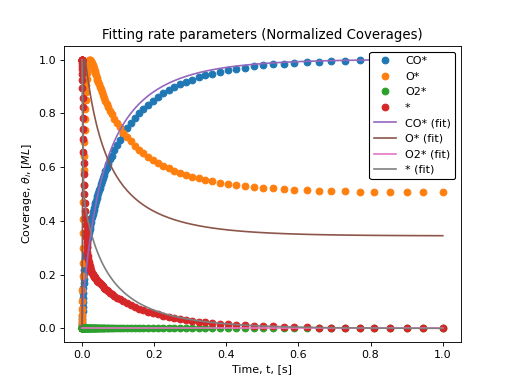

CPU times: user 4.43 s, sys: 101 ms, total: 4.53 s
Wall time: 4.96 s


In [9]:
%%time 
#Fitting for Model 1: (without CD) #using ML_RandomForestRegressor
fit1_c_a = Fitting('coverages_1_nCD.csv','Atomic_1.csv','Stoich_1.csv','Param_1_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t1_c_a,covg1_c_a,fits1_c_a = fit1_c_a.fitting_rate_param(option='ML',mdl='RandomForestRegressor',n=num_dat_model_1,filename=filename_model_1,plot_norm=True) 

Mass is conserved. 

50.0 % of the Input dataset is being extracted for fitting (i.e 108 points are being extracted for fitting)

An essentially zero vector is present and therefore cant be normalized. The same vector has been returned.

--------------------------------------------------
Performing fitting using scikit machine learning algorithms:
--------------------------------------------------
-Using Algorithm: K Nearest Neighbor Regressor:

The Model Mean Squared Errors: 
 [2.930e+00 4.475e-18 1.250e+04 5.125e+10 4.460e+16 3.780e-04 9.750e-13
 1.195e+04]
50.0 % of the Input dataset is being extracted for fitting (i.e 108 points are being extracted for fitting)

50.0 % of the Input dataset is being extracted for fitting (i.e 108 points are being extracted for fitting)

50.0 % of the Input dataset is being extracted for fitting (i.e 108 points are being extracted for fitting)

An essentially zero vector is present and therefore cant be normalized. The same vector has been returned.


<IPython.core.display.Javascript object>


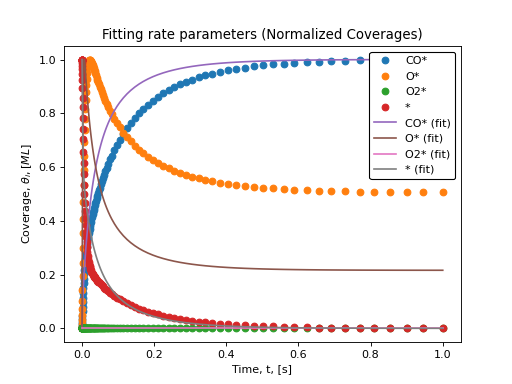

CPU times: user 3.92 s, sys: 922 ms, total: 4.84 s
Wall time: 3.83 s


In [10]:
%%time 
#Fitting for Model 1: (without CD) #using KNeighborsRegressor
fit1_c_b = Fitting('coverages_1_nCD.csv','Atomic_1.csv','Stoich_1.csv','Param_1_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t1_c_b,covg1_c_b,fits1_c_b = fit1_c_b.fitting_rate_param(option='ML',mdl='KNeighborsRegressor',n=num_dat_model_1,filename=filename_model_1,plot_norm=True)

Mass is conserved. 

50.0 % of the Input dataset is being extracted for fitting (i.e 108 points are being extracted for fitting)

An essentially zero vector is present and therefore cant be normalized. The same vector has been returned.

--------------------------------------------------
Performing fitting using scikit machine learning algorithms:
--------------------------------------------------
-Using Algorithm: Decision Tree Regressor:

The Model Mean Squared Errors: 
 [1.0703125e+00 2.0000000e-18 8.3828125e+04 6.9843750e+10 8.2031250e+15
 5.0000000e-04 3.6406250e-12 8.2812500e+03]
50.0 % of the Input dataset is being extracted for fitting (i.e 108 points are being extracted for fitting)

50.0 % of the Input dataset is being extracted for fitting (i.e 108 points are being extracted for fitting)

50.0 % of the Input dataset is being extracted for fitting (i.e 108 points are being extracted for fitting)

An essentially zero vector is present and therefore cant be normalized. The same

<IPython.core.display.Javascript object>


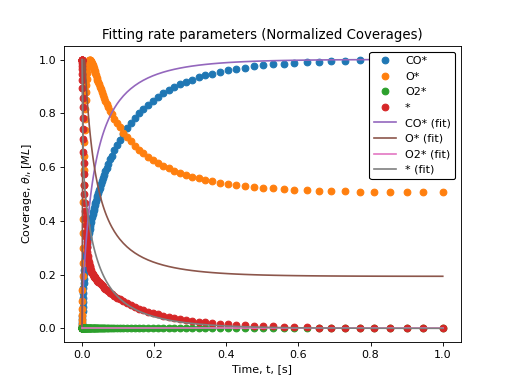

CPU times: user 3.84 s, sys: 28.7 ms, total: 3.87 s
Wall time: 3.85 s


In [11]:
%%time 
#Fitting for Model 1: (without CD) #using DecisionTreeRegressor
fit1_c_c = Fitting('coverages_1_nCD.csv','Atomic_1.csv','Stoich_1.csv','Param_1_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t1_c_c,covg1_c_c,fits1_c_c = fit1_c_c.fitting_rate_param(option='ML',mdl='DecisionTreeRegressor',n=num_dat_model_1,filename=filename_model_1,plot_norm=True) 

Mass is conserved. 

50.0 % of the Input dataset is being extracted for fitting (i.e 108 points are being extracted for fitting)

An essentially zero vector is present and therefore cant be normalized. The same vector has been returned.

--------------------------------------------------
Performing fitting using scikit machine learning algorithms:
--------------------------------------------------
-Using Algorithm: MLPRegressor | (FeedForward) Neural Network:

Number of Hidden layer nodes per layer :  10
Number of Hidden layers:  3


/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


The Model Mean Squared Errors: 
 [4.61035124e+00 1.97515250e-16 3.17825933e+05 5.11176436e+11
 2.72499948e+17 7.96191494e-04 4.84113326e-12 1.01552769e+05]
50.0 % of the Input dataset is being extracted for fitting (i.e 108 points are being extracted for fitting)

50.0 % of the Input dataset is being extracted for fitting (i.e 108 points are being extracted for fitting)

50.0 % of the Input dataset is being extracted for fitting (i.e 108 points are being extracted for fitting)

An essentially zero vector is present and therefore cant be normalized. The same vector has been returned.


 Initial guess: 

-> Rate Constants:
 [1.e+00 1.e-09 1.e+02 1.e+05 1.e+08 1.e-02 1.e-06 1.e+02]

 Final predictions: 

-> Rate Constants:
 [4.71875031e+00 1.21418799e-08 5.48177215e+01 5.55225481e+01
 5.76271627e+01 5.34374928e-02 5.16605386e-06 5.63407954e+01]


<IPython.core.display.Javascript object>


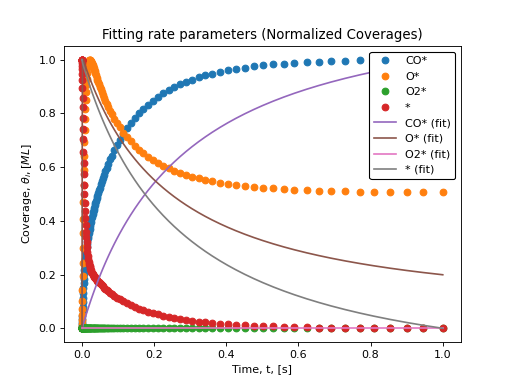

CPU times: user 5.2 s, sys: 36.2 ms, total: 5.23 s
Wall time: 5.22 s


In [12]:
%%time 
#Fitting for Model 1: (without CD) #using MLPRegressor
fit1_c_d = Fitting('coverages_1_nCD.csv','Atomic_1.csv','Stoich_1.csv','Param_1_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t1_c_d,covg1_c_d,fits1_c_d = fit1_c_d.fitting_rate_param(option='ML',mdl='MLPRegressor',n=num_dat_model_1,filename=filename_model_1,plot_norm=True)

## |--->With CD

## Model 2

***
$\mathbf{\text{Micro Kinetic Model for (a 7 step Redox Mechanism) Water Gas Shift Reaction}}:$<br>
#### [Link to Relevant Paper](https://www.mdpi.com/2673-4583/2/1/11) 
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + H_{2}O {\stackrel{\tiny{\textrm{Ni/CeO_2}}}{\rightleftharpoons}} CO_2 + H_2$$
$Ea = -41kJ{mol}^{-1}$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of $CO$ / Desorption of ${CO}^{*}$

$$ {CO}(g) + * \rightleftharpoons {CO}^{*} $$  <br> 


Reaction 2:&emsp;Adsorption of $H_{2}O$ / Desorption of ${H_{2}O}^{*}$

$$ {H_{2}O}(g) + * \rightleftharpoons {H_{2}O}^{*} $$  <br> 


Reaction 3:&emsp;Dissociation of ${H_{2}O}^*$ / Surface Reaction of ${OH}^{*}$ and $H^*$

$$ {H_{2}O}^* + * \rightleftharpoons {OH}^{*} + H^* $$  <br>


Reaction 4:&emsp;Surface Reaction of ${CO}^{*}$ and ${OH}^*$ / Dissociation of ${COOH}^*$ (1)

$$ {CO}^* + {OH}^* \rightleftharpoons {COOH}^{*} + * $$  <br> 


Reaction 5:&emsp;Dissociation of ${COOH}^*$ (2) / Surface Reaction of ${CO_2}^{*}$ and ${H}^*$

$$ {COOH}^* + * \rightleftharpoons {CO_2}^* + {H}^* $$  <br> 


Reaction 6:&emsp;Desorption of $2H^*$ / Adsorption of $H_2$

$$ 2H^{*} \rightleftharpoons {H_2}(g) + 2^* $$  <br> 


Reaction 7:&emsp;Desorption of ${CO_2}^*$ / Adsorption of ${CO}_2$   

$$ {{CO}_2}^{*} \rightleftharpoons {CO_2}(g) + * $$  <br> 

***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$

### The Atomic/Species Matrix ($\nu$):

The participating species for this surface reaction mechanism are:
1. CO
2. ${H_2}O$
3. $CO_2$
4. $H_2$
5. ${CO}^*$
6. ${{H_2}O}^*$
7. $H^*$
8. ${OH}^*$
9. ${COOH}^*$
10. ${CO_2}^*$
11. *

\begin{equation}
\
\nu=\begin{bmatrix}
    &   CO  &  {H_2}O &   CO_2  &  H_2  &  {CO}^* & {H_2}O^* &   H^* & {OH}^* & {COOH}^* & {CO_2}^* & *\\
H   &   0   &  2      &   0     &  2    &   0     &   2      &   1   &   1    &    1     &    0     & 0\\
C   &   1   &  0      &   1     &  0    &   1     &   0      &   0   &   0    &    1     &    1     & 0\\
O   &   1   &  1      &   2     &  0    &   1     &   1      &   0   &   1    &    2     &    2     & 0\\
*   &   0   &  0      &   0     &  0    &   1     &   1      &   1   &   1    &    1     &    1     & 1\end{bmatrix} 
\
\end{equation}

Atomic Matrix Size : (3x11)
### The Stoichiometric Matrix (A):

\begin{equation}
\
A=\begin{bmatrix}
    &P_{CO}&P_{{H_2}O}& P_{CO_2}&P_{H_2}&\theta_{CO}&\theta_{{H_2}O}&\theta_{H}&\theta_{OH}&\theta_{COOH}&\theta_{{CO}_2}&\theta_*\\
r1  &  -1   &  0       &   0     &  0    &   1       &   0           &   0      &   0    &    0     &    0     &-1\\
r2  &   0   & -1       &   0     &  0    &   0       &   1           &   0      &   0    &    0     &    0     &-1\\
r3  &   0   &  0       &   0     &  0    &   0       &  -1           &   1      &   1    &    0     &    0     &-1\\
r4  &   0   &  0       &   0     &  0    &  -1       &   0           &   0      &  -1    &    1     &    0     & 1\\
r5  &   0   &  0       &   0     &  0    &   0       &   0           &   1      &   0    &   -1     &    1     &-1\\
r6  &   0   &  0       &   0     &  1    &   0       &   0           &  -2      &   0    &    0     &    0     & 2\\
r7  &   0   &  0       &   1     &  0    &   0       &   0           &   0      &   0    &    0     &   -1     & 1\end{bmatrix}  
\
\end{equation}

Stoichiometric Matrix Size : (7x11)

Note:

- For Mass to be conserved:
$$\mathbf{A}\mathbf{\nu = 0}$$

$i =$ species

$j =$ reaction

- To find the Rate of reaction of reaction j:

$$ r_j = k_{j,f} \prod_{i_f} P_{i,f} \theta_{i,f}^{A_{i,j}} - k_{j,r} \prod_{i_r} P_{i,r} \theta_{i,r}^{A_{i,j}}  $$

- To find the Rate of production of species i:
$$R_{\theta_i}=\frac{d\theta_i}{dt} = \sum_j A_{j,i} \cdot r_j $$

#### Therefore:

Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{{H_2}O} \cdot \theta_{*} - k_{2}^r \cdot \theta_{{H_2}O} $$

$$r_3 = k_{3}^f \cdot \theta_{{H_2}O} \cdot \theta_{*} - k_{3}^r \cdot \theta_{OH} \cdot \theta_{H}$$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{OH} - k_{4}^r \cdot \theta_{COOH} \cdot \theta_{*} $$

$$r_5 = k_{5}^f \cdot \theta_{COOH} \cdot \theta_{*} - k_{5}^r \cdot \theta_{{CO}_2} \cdot \theta_{H}$$

$$r_6 = k_{6}^f \cdot \theta_{H}^2   - k_{6}^r \cdot \textrm{P}_{H_2} \cdot \theta_{*}^2 $$

$$r_7 = k_{7}^f \cdot \theta_{{CO}_2}  - k_{7}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*}$$

The Corresponding Differential Equations corresponding to the rate of formations/productions of the different coverages:

$$R_{\theta_{CO}} = \frac{d\theta_{CO}}{dt} = r_1 - r_4$$

$$R_{\theta_{{H_2}O}} = \frac{d\theta_{{H_2}O}}{dt} = r_2 - r_3 $$

$$R_{\theta_{H}} = \frac{d\theta_{H}}{dt} = r_3 + r_5 - 2 r_6 $$

$$R_{\theta_{OH}} = \frac{d\theta_{OH}}{dt} = r_3 - r_4 $$

$$R_{\theta_{COOH}} = \frac{d\theta_{COOH}}{dt} = r_4 - r_5 $$

$$R_{\theta_{{CO}_2}} = \frac{d\theta_{{CO}_2}}{dt} = r_5 - r_7 $$

$$R_{\theta_{*}} = \frac{d\theta_{*}}{dt} = r_7 + 2 r_6 + r_4 - r_6 - r_3 - r_2 - r_1 $$



In [13]:
num_dat_model_2 = 100 #for ML data generation
filename_model_2='ML_dataset_2.xlsx'    

## |--->Without CD

Mass is conserved. 

50.0 % of the Input dataset is being extracted for fitting (i.e 96 points are being extracted for fitting)

An essentially zero vector is present and therefore cant be normalized. The same vector has been returned.

Performing fitting using optimize.curve_fit:
--------------------------------------------------
-Using Method: trf

 Initial guess: 

-> Rate Constants:
 [1.e+11 1.e+11 1.e+11 1.e+10 1.e+13 1.e+14 1.e+10 1.e+05 1.e+13 1.e+14
 1.e+10 1.e+08 1.e+12 1.e+11]

 Final predictions: 

-> Rate Constants:
 [4.39989976e+11 3.22855529e+11 2.77492853e+11 1.00000000e+10
 1.00054069e+13 1.00000000e+14 1.00000000e+10 1.00000000e+05
 1.00000000e+13 1.00000000e+14 1.00000000e+10 1.05037771e+08
 1.01696895e+12 5.17853866e+11]


<IPython.core.display.Javascript object>


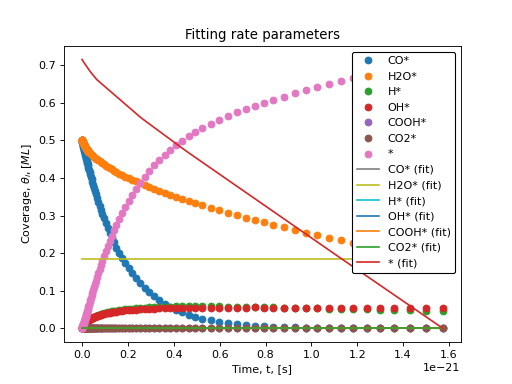

CPU times: user 28.4 s, sys: 20.2 s, total: 48.6 s
Wall time: 19.7 s


In [14]:
%%time 
#Fitting for Model 2: (without CD) #using curve fit
fit2_a = Fitting('coverages_2_nCD.csv','Atomic_2.csv','Stoich_2.csv','Param_2_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t2_a,covg2_a,fits2_a = fit2_a.fitting_rate_param(option='cf',plot=True,maxfev=1e15,xtol=1e-15,ftol=1e-15) #cf stands for curve fit

Mass is conserved. 

50.0 % of the Input dataset is being extracted for fitting (i.e 96 points are being extracted for fitting)

An essentially zero vector is present and therefore cant be normalized. The same vector has been returned.

--------------------------------------------------
Performing fitting using optimize.minimize:
--------------------------------------------------
-Using Method: nelder-mead


/Users/klkusima/Desktop/RASH Research/CO_ox/Kinetics/OOP_Kinetics/OOP/OOP3/main.py:1034: OptimizeWarning: Unknown solver options: gtol, maxfun
  result = optimize.minimize(self.error_func_0, initial_vals



 Initial guess: 

-> Rate Constants:
 [1.e+11 1.e+11 1.e+11 1.e+10 1.e+13 1.e+14 1.e+10 1.e+05 1.e+13 1.e+14
 1.e+10 1.e+08 1.e+12 1.e+11]

 Final predictions: 

-> Rate Constants:
 [1.73438966e+09 2.95835878e+12 0.00000000e+00 0.00000000e+00
 5.15477644e+15 1.00000000e+17 3.42946430e+12 0.00000000e+00
 1.00000000e+16 6.24769017e+12 4.47616726e+11 6.70033262e+09
 1.68834131e+13 2.22511777e+13]


<IPython.core.display.Javascript object>


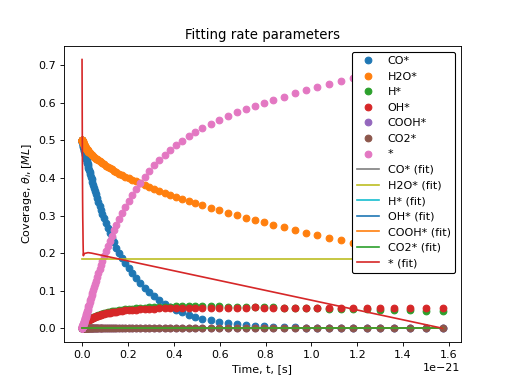

CPU times: user 2min 25s, sys: 494 ms, total: 2min 25s
Wall time: 2min 25s


In [15]:
%%time 
#Fitting for Model 2: (without CD) #using function minizer
fit2_b_a = Fitting('coverages_2_nCD.csv','Atomic_2.csv','Stoich_2.csv','Param_2_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t2_b_a,covg2_b_a,fits2_b_a = fit2_b_a.fitting_rate_param(option='min',method_min='nelder-mead',maxiter=1e3,maxfun=1e3,plot=True) #min stands for minimize

Mass is conserved. 

50.0 % of the Input dataset is being extracted for fitting (i.e 96 points are being extracted for fitting)

An essentially zero vector is present and therefore cant be normalized. The same vector has been returned.

--------------------------------------------------
Performing fitting using optimize.minimize:
--------------------------------------------------
-Using Method: L-BFGS-B


/Users/klkusima/Desktop/RASH Research/CO_ox/Kinetics/OOP_Kinetics/OOP/OOP3/main.py:1034: OptimizeWarning: Unknown solver options: xatol, fatol, adaptive
  result = optimize.minimize(self.error_func_0, initial_vals



 Initial guess: 

-> Rate Constants:
 [1.e+11 1.e+11 1.e+11 1.e+10 1.e+13 1.e+14 1.e+10 1.e+05 1.e+13 1.e+14
 1.e+10 1.e+08 1.e+12 1.e+11]

 Final predictions: 

-> Rate Constants:
 [1.e+11 1.e+11 1.e+11 1.e+10 1.e+13 1.e+14 1.e+10 1.e+05 1.e+13 1.e+14
 1.e+10 1.e+08 1.e+12 1.e+11]


<IPython.core.display.Javascript object>


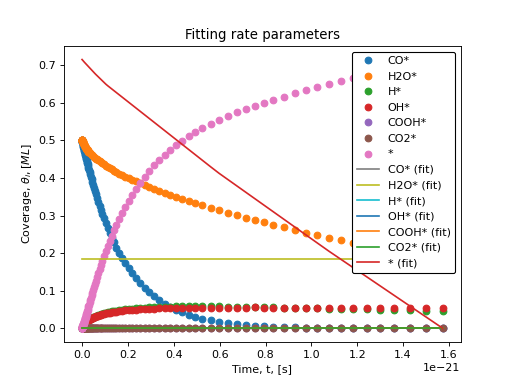

CPU times: user 21.5 s, sys: 70.5 ms, total: 21.6 s
Wall time: 21.5 s


In [16]:
%%time 
#Fitting for Model 2: (without CD) #using function minizer
fit2_b_b = Fitting('coverages_2_nCD.csv','Atomic_2.csv','Stoich_2.csv','Param_2_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t2_b_b,covg2_b_b,fits2_b_b = fit2_b_b.fitting_rate_param(option='min',method_min='L-BFGS-B',maxiter=1e3,maxfun=1e3,plot=True) #min stands for minimize

Mass is conserved. 

50.0 % of the Input dataset is being extracted for fitting (i.e 96 points are being extracted for fitting)

An essentially zero vector is present and therefore cant be normalized. The same vector has been returned.

--------------------------------------------------
Performing fitting using scikit machine learning algorithms:
--------------------------------------------------
-Using Algorithm: Random Forest Regressor:

The Model Mean Squared Errors: 
 [7.75948417e+22 7.06001002e+22 3.07417534e+22 6.71321684e+20
 5.89908546e+24 7.85264178e+28 5.08001827e+20 1.05974380e+11
 6.60647104e+24 1.00461350e+29 4.75131617e+20 5.38977469e+16
 5.36932136e+22 7.86675851e+22]
50.0 % of the Input dataset is being extracted for fitting (i.e 96 points are being extracted for fitting)

50.0 % of the Input dataset is being extracted for fitting (i.e 96 points are being extracted for fitting)

50.0 % of the Input dataset is being extracted for fitting (i.e 96 points are being extracte

<IPython.core.display.Javascript object>


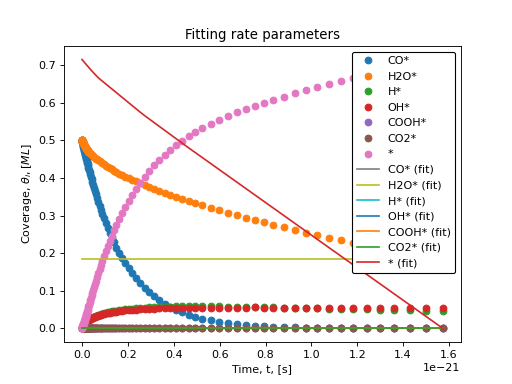

CPU times: user 11.7 s, sys: 57.2 ms, total: 11.8 s
Wall time: 11.8 s


In [17]:
%%time 
#Fitting for Model 2: (without CD) #using ML_RandomForestRegressor
fit2_c_a = Fitting('coverages_2_nCD.csv','Atomic_2.csv','Stoich_2.csv','Param_2_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t2_c_a,covg2_c_a,fits2_c_a = fit2_c_a.fitting_rate_param(option='ML',mdl='RandomForestRegressor',n=num_dat_model_2,filename=filename_model_2,plot=True) 

Mass is conserved. 

50.0 % of the Input dataset is being extracted for fitting (i.e 96 points are being extracted for fitting)

An essentially zero vector is present and therefore cant be normalized. The same vector has been returned.

--------------------------------------------------
Performing fitting using scikit machine learning algorithms:
--------------------------------------------------
-Using Algorithm: K Nearest Neighbor Regressor:

The Model Mean Squared Errors: 
 [5.474e+22 1.974e+22 1.200e+21 5.792e+20 5.366e+24 8.652e+28 4.312e+20
 6.612e+10 5.558e+24 6.290e+28 1.684e+20 1.584e+16 4.830e+22 7.756e+22]
50.0 % of the Input dataset is being extracted for fitting (i.e 96 points are being extracted for fitting)

50.0 % of the Input dataset is being extracted for fitting (i.e 96 points are being extracted for fitting)

50.0 % of the Input dataset is being extracted for fitting (i.e 96 points are being extracted for fitting)

An essentially zero vector is present and therefore

<IPython.core.display.Javascript object>


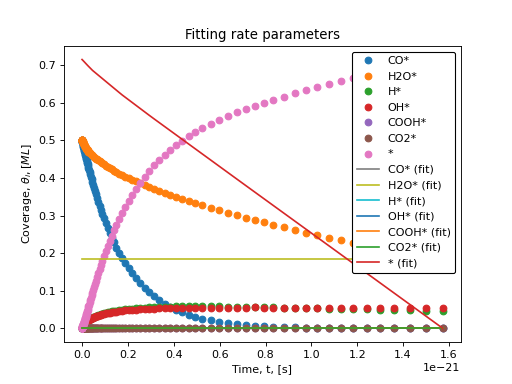

CPU times: user 11.9 s, sys: 590 ms, total: 12.5 s
Wall time: 11.9 s


In [18]:
%%time 
#Fitting for Model 2: (without CD) #using KNeighborsRegressor
fit2_c_b = Fitting('coverages_2_nCD.csv','Atomic_2.csv','Stoich_2.csv','Param_2_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t2_c_b,covg2_c_b,fits2_c_b = fit2_c_b.fitting_rate_param(option='ML',mdl='KNeighborsRegressor',n=num_dat_model_2,filename=filename_model_2,plot=True)

Mass is conserved. 

50.0 % of the Input dataset is being extracted for fitting (i.e 96 points are being extracted for fitting)

An essentially zero vector is present and therefore cant be normalized. The same vector has been returned.

--------------------------------------------------
Performing fitting using scikit machine learning algorithms:
--------------------------------------------------
-Using Algorithm: Decision Tree Regressor:

The Model Mean Squared Errors: 
 [7.78750000e+22 7.05265625e+22 3.06562500e+22 6.71765625e+20
 5.90562500e+24 7.85312500e+28 5.07562500e+20 1.05500000e+11
 6.59000000e+24 1.00731250e+29 4.72765625e+20 5.39765625e+16
 5.37640625e+22 7.87265625e+22]
50.0 % of the Input dataset is being extracted for fitting (i.e 96 points are being extracted for fitting)

50.0 % of the Input dataset is being extracted for fitting (i.e 96 points are being extracted for fitting)

50.0 % of the Input dataset is being extracted for fitting (i.e 96 points are being extracte

<IPython.core.display.Javascript object>


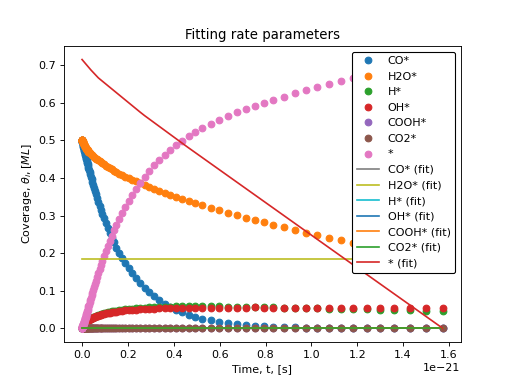

CPU times: user 11.8 s, sys: 487 ms, total: 12.3 s
Wall time: 11.8 s


In [19]:
%%time 
#Fitting for Model 2: (without CD) #using DecisionTreeRegressor
fit2_c_c = Fitting('coverages_2_nCD.csv','Atomic_2.csv','Stoich_2.csv','Param_2_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t2_c_c,covg2_c_c,fits2_c_c = fit2_c_c.fitting_rate_param(option='ML',mdl='DecisionTreeRegressor',n=num_dat_model_2,filename=filename_model_2,plot=True) 

Mass is conserved. 

50.0 % of the Input dataset is being extracted for fitting (i.e 96 points are being extracted for fitting)

An essentially zero vector is present and therefore cant be normalized. The same vector has been returned.

--------------------------------------------------
Performing fitting using scikit machine learning algorithms:
--------------------------------------------------
-Using Algorithm: MLPRegressor | (FeedForward) Neural Network:

Number of Hidden layer nodes per layer :  10
Number of Hidden layers:  3
The Model Mean Squared Errors: 
 [1.91500000e+23 2.49500000e+23 2.22000000e+23 3.73499999e+21
 3.53000000e+25 4.15500000e+29 2.99999999e+21 4.80431424e+11
 2.57000000e+25 2.33500000e+29 1.87000000e+21 2.87499947e+17
 3.21000000e+23 4.34500000e+23]
50.0 % of the Input dataset is being extracted for fitting (i.e 96 points are being extracted for fitting)

50.0 % of the Input dataset is being extracted for fitting (i.e 96 points are being extracted for fitting)


/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


<IPython.core.display.Javascript object>


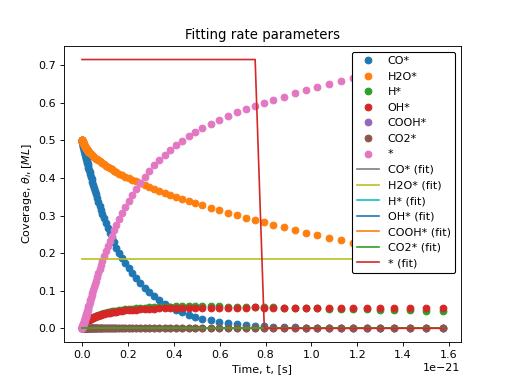

CPU times: user 19.3 s, sys: 14.5 s, total: 33.8 s
Wall time: 14.8 s


In [20]:
%%time 
#Fitting for Model 2: (without CD) #using MLPRegressor
fit2_c_d = Fitting('coverages_2_nCD.csv','Atomic_2.csv','Stoich_2.csv','Param_2_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t2_c_d,covg2_c_d,fits2_c_d = fit2_c_d.fitting_rate_param(option='ML',mdl='MLPRegressor',n=num_dat_model_2,filename=filename_model_2,plot=True)

## |--->With CD